# EDA 2

In [3]:
import numpy as np
import pandas as pd
from collections import defaultdict
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import SimpleITK as sitk

import sys
"../scripts" not in sys.path and sys.path.insert(0, '../scripts')

import read_scans_utils
import patient
from patient import Patient

In [4]:
PATH_TO_NIFTI_DELINEATIONS = f"../data/Regions ground truth/delineations_nifti"

In [5]:
patient_loader = read_scans_utils.load_patients_from_pickle(
            pickles_path = "../data/pkl_preprocessed"
        )

In [6]:
region_sizes_vcc = {
    "GG3": [],
    "GG4": [],
    "Cribriform": []
}

for delineation_file in os.listdir(PATH_TO_NIFTI_DELINEATIONS):
    print(delineation_file)
    
    delineation = sitk.ReadImage(f"{PATH_TO_NIFTI_DELINEATIONS}/{delineation_file}")
    delineation_array = sitk.GetArrayFromImage(delineation)

    region_voxel_counts = np.unique(delineation_array, return_counts = True)  
    spacing = delineation.GetSpacing()

    for region_type, voxel_count in zip(region_voxel_counts[0].astype(int), region_voxel_counts[1]):
        if region_type != 0:
            region_type_name = "GG3" if region_type == 1 else "GG4" if region_type == 2 else "Cribriform"
            
            vcc = (spacing[0] * spacing[1] * spacing[2]) * voxel_count / 1000
            
            # print(f"V(cc) of {region_type_name} is: {round(vcc, 3)} cc")

            if region_type_name in region_sizes_vcc:
                region_sizes_vcc[region_type_name].append(vcc)



MARPROC007_combined_delineation.nii.gz
MARPROC009_combined_delineation.nii.gz
MARPROC012_combined_delineation.nii.gz
MARPROC015_combined_delineation.nii.gz
MARPROC017_combined_delineation.nii.gz
MARPROC019_combined_delineation.nii.gz
MARPROC023_combined_delineation.nii.gz
MARPROC024_combined_delineation.nii.gz
MARPROC025_combined_delineation.nii.gz
MARPROC026_combined_delineation.nii.gz
MARPROC028_combined_delineation.nii.gz
MARPROC029_combined_delineation.nii.gz
MARPROC030_combined_delineation.nii.gz
MARPROC033_combined_delineation.nii.gz
MARPROC034_combined_delineation.nii.gz
MARPROC035_combined_delineation.nii.gz
MARPROC036_combined_delineation.nii.gz
MARPROC037_combined_delineation.nii.gz
MARPROC038_combined_delineation.nii.gz
MARPROC039_combined_delineation.nii.gz
MARPROC042_combined_delineation.nii.gz
MARPROC044_combined_delineation.nii.gz
MARPROC045_combined_delineation.nii.gz
MARPROC046_combined_delineation.nii.gz
MARPROC047_combined_delineation.nii.gz
MARPROC048_combined_delin

In [7]:
print(region_sizes_vcc)

{'GG3': [2.1587034417229005, 0.22018448296004112, 0.586395263671875, 0.911406905732375, 0.4957603182869207, 0.6141448974609375, 0.6211852533670026, 0.05495453317598731, 0.8471978370446472, 1.0104904174804688, 0.5919387817382813, 0.784149169921875, 1.3213760375976562, 0.14923095703125, 0.4844970703125, 1.0798004150390625, 7.380280480362489, 0.33757779299594404, 1.3200301074957679, 8.249459838867187, 0.2821746826171875, 0.48359981508256167, 0.45915069580078127, 1.7374603271484375, 0.6051634376315627, 0.5547042846679687, 0.6621460487163858, 0.48360185112493803, 0.33555905536341013, 0.2880000085830689, 2.8584000851869593, 1.855675713976223, 1.7155200511264805, 0.22080000658035284, 0.8083200240898134, 0.45168001346111303, 7.985760237994196, 1.458240043458939, 1.0881600324296954, 1.095360032644272, 0.1262400037622452, 2.957611083984375, 0.0547200016307831, 0.648000019311905, 0.9288025404280619, 1.813440054044724, 0.8788800261926653, 0.7680000457763678, 0.4176000124454499, 0.4396800480461132,

In [8]:

# voxel_dists, shapes, slice_occupance_dist = read_scans_utils.collect_patient_metadata(patient_loader, read_from_files = False)
# print(voxel_dists)

voxel_dists, shapes, slice_occupance_dist = read_scans_utils.collect_patient_metadata(read_from_files=True)
print(voxel_dists)
print(len(voxel_dists['full_image']))


{'full_image': [('MARPROC007', {0: 7853629, 1: 9624, 2: 1067}), ('MARPROC009', {0: 20735303, 1: 481, 2: 97, 3: 119}), ('MARPROC012', {0: 15550719, 1: 1281}), ('MARPROC015', {0: 16586250, 1: 1991, 2: 559}), ('MARPROC017', {0: 7599757, 1: 2134, 2: 285}), ('MARPROC019', {0: 7861513, 1: 2738, 2: 69}), ('MARPROC023', {0: 15550497, 1: 1357, 2: 85, 3: 61}), ('MARPROC024', {0: 7863979, 1: 245, 2: 96}), ('MARPROC025', {0: 14866439, 1: 1765, 3: 276}), ('MARPROC026', {0: 7863717, 2: 603}), ('MARPROC028', {0: 7857484, 1: 4505, 2: 2258, 3: 73}), ('MARPROC029', {0: 7860320, 1: 2639, 2: 1361}), ('MARPROC030', {0: 15550117, 1: 1713, 2: 170}), ('MARPROC033', {0: 7822651, 1: 5891, 2: 28756, 3: 7022}), ('MARPROC034', {0: 15551275, 1: 326, 2: 399}), ('MARPROC035', {0: 7859453, 1: 2160, 2: 2405, 3: 302}), ('MARPROC036', {0: 7859506, 1: 4814}), ('MARPROC037', {0: 7831161, 1: 32903, 2: 122, 3: 134}), ('MARPROC038', {0: 7855891, 1: 1505, 2: 6924}), ('MARPROC039', {0: 7857218, 1: 5885, 2: 1217}), ('MARPROC042'

### Data for the full images per patient

In [9]:
gg_pattern_counts_fullimg = defaultdict(int)

lesion_sizes_fullimg = {"GG3": [],
                "GG4": [],
                "Cribriform": []}

lesion_vs_background_ratios_fullimg = []

for patient_id, dct in voxel_dists["full_image"]:
    if 1 in dct:
        gg_pattern_counts_fullimg["GG3"] += 1
        lesion_sizes_fullimg["GG3"].append(dct[1])
    if 2 in dct:
        gg_pattern_counts_fullimg["GG4"] += 1
        lesion_sizes_fullimg["GG4"].append(dct[2])
    if 3 in dct:
        gg_pattern_counts_fullimg["Cribriform"] += 1
        lesion_sizes_fullimg["Cribriform"].append(dct[3])

    lesion_vs_background_ratios_fullimg.append(
        (sum([dct[pattern] for pattern in dct if pattern != 0]), dct[0])
    )

# Determining the ratios of background vs lesion voxels
ratios_percentages_fullimg = [round(lesion/background * 100, 4)
                     for lesion, background in lesion_vs_background_ratios_fullimg]

In [10]:
# Count cribriform patients
print(len([x for _, x in voxel_dists["full_image"] if 3 in x]))


73




### Data for the subimages of relevant slices per patient

In [11]:
gg_pattern_counts_subimg = defaultdict(int)

lesion_sizes_subimg = {"GG3": [],
                "GG4": [],
                "Cribriform": []}

lesion_vs_background_ratios_subimg = []

for patient_id, dct in voxel_dists["sub_image"]:
    if 1 in dct:
        gg_pattern_counts_subimg["GG3"] += 1
        lesion_sizes_subimg["GG3"].append(dct[1])
    if 2 in dct:
        gg_pattern_counts_subimg["GG4"] += 1
        lesion_sizes_subimg["GG4"].append(dct[2])
    if 3 in dct:
        gg_pattern_counts_subimg["Cribriform"] += 1
        lesion_sizes_subimg["Cribriform"].append(dct[3])

    lesion_vs_background_ratios_subimg.append(
        (sum([dct[pattern] for pattern in dct if pattern != 0]), dct[0])
    )

# Determining the ratios of background vs lesion voxels
ratios_percentages_subimg = [round(lesion/background * 100, 4)
                     for lesion, background in lesion_vs_background_ratios_subimg]

### Data for the individual relevant slices

In [12]:
gg_pattern_counts_slices = defaultdict(int)

lesion_sizes_slices = {"GG3": [],
                "GG4": [],
                "Cribriform": []}

lesion_vs_background_ratios_slices = []

for patient_id, dct in voxel_dists["data_slices"]:
    if 1 in dct:
        gg_pattern_counts_slices["GG3"] += 1
        lesion_sizes_slices["GG3"].append(dct[1])
    if 2 in dct:
        gg_pattern_counts_slices["GG4"] += 1
        lesion_sizes_slices["GG4"].append(dct[2])
    if 3 in dct:
        gg_pattern_counts_slices["Cribriform"] += 1
        lesion_sizes_slices["Cribriform"].append(dct[3])

    lesion_vs_background_ratios_slices.append(
        (sum([dct[pattern] for pattern in dct if pattern != 0]), dct[0])
    )

# Determining the ratios of background vs lesion voxels
ratios_percentages_slices = [round(lesion/background * 100, 4)
                     for lesion, background in lesion_vs_background_ratios_slices]

print(lesion_vs_background_ratios_slices[0:5])
print(sorted(ratios_percentages_slices, reverse=True)[0:5])

print(len(voxel_dists["data_slices"]))

[(721, 261423), (2507, 259637), (2590, 259554), (1816, 260328), (936, 261208)]
[5.1761, 4.8639, 4.6178, 4.4769, 4.4428]
1485


## Plotting

### Ratio between gleason patterns presence in dataset

[Text(0.5, 1.0, 'Ratio of Gleason patterns across dataset')]

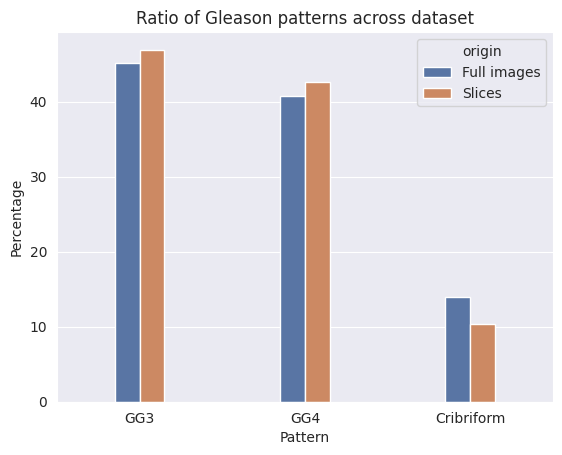

In [13]:
sns.set_style('darkgrid')


df1 = pd.DataFrame(gg_pattern_counts_fullimg, 
                   index = ["Full images"]).T.reset_index()
df2 = pd.DataFrame(gg_pattern_counts_slices,
                   index = ["Slices"]).T.reset_index()

df1["Full images"] = (df1["Full images"] / sum(df1["Full images"])) * 100
df2["Slices"] = (df2["Slices"] / sum(df2["Slices"])) * 100

df_merged = pd.merge(df1, df2).rename(columns={"index": "Pattern"})

df_long = pd.melt(df_merged,
                  id_vars = 'Pattern',
                  value_name = "Percentage",
                  var_name = "origin")

sns.barplot(x = "Pattern",
            y = "Percentage",
            data = df_long,
            hue = "origin",
            width = 0.3,
            palette = "deep").set(
                title = "Ratio of Gleason patterns across dataset"
            )


Cribriform is underrepresented. \
Even moreso when considering only slices as datapoints, which indicates the cribriform lesions are generally smaller and thus encompass less slices.

In [14]:
patients_amount = len(voxel_dists["full_image"])
slices_amount = len(voxel_dists["data_slices"])
print(patients_amount)
print(slices_amount)

# gg_pattern_counts_fullimg_percentages = {
#     "GG3": gg_pattern_counts_fullimg[gg_pattern_counts_fullimg]
# }
print(gg_pattern_counts_fullimg)
print(gg_pattern_counts_slices)

gp_percentages_patients = [str(int(round((count/patients_amount) * 100, 0))) + "%"
                           for count in gg_pattern_counts_fullimg.values()]
gp_percentages_slices = [str(int(round((count/slices_amount) * 100, 0))) + "%"
                         for count in gg_pattern_counts_slices.values()]

print(gp_percentages_patients)
print(gp_percentages_slices)

df_gp_percentages = pd.DataFrame({"Patients": gp_percentages_patients, "Slices": gp_percentages_slices},
                                 index = gg_pattern_counts_fullimg.keys())
display(df_gp_percentages)

275
1485
defaultdict(<class 'int'>, {'GG3': 236, 'GG4': 213, 'Cribriform': 73})
defaultdict(<class 'int'>, {'GG3': 1036, 'GG4': 942, 'Cribriform': 229})
['86%', '77%', '27%']
['70%', '63%', '15%']


,Patients,Slices
GG3,86%,70%
GG4,77%,63%
Cribriform,27%,15%


### Lesion size distribution

In [15]:
def remove_outliers(data, alpha):
    return [item for item in data
            if 
            item > np.quantile(data, alpha)
            and 
            item < np.quantile(data, 1.0 - alpha)]

,Mean,Median
gg3 lesion size in slices,733.1,519.0
gg4 lesion size in slices,823.4,509.5
cribriform lesion size in slices,424.8,216.0


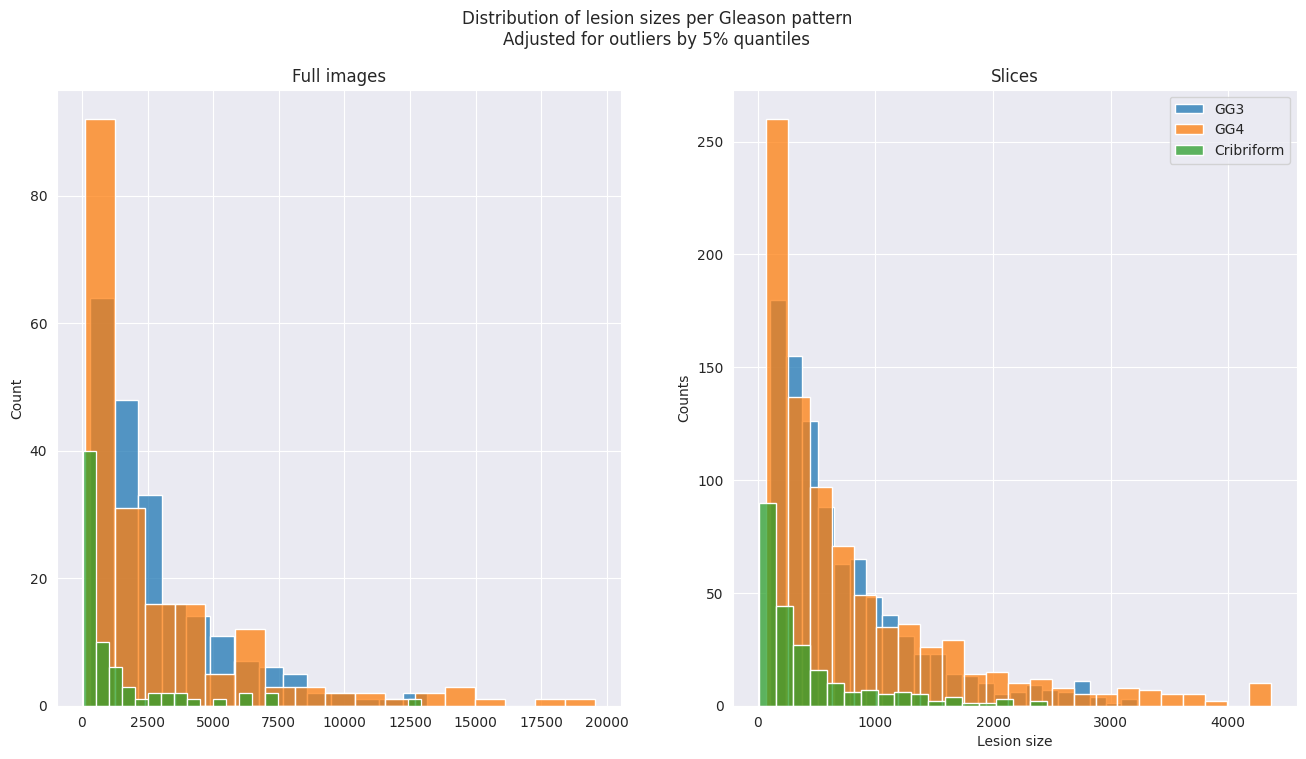

In [16]:
# size of lesions
fig, axes = plt.subplots(1, 2, figsize = (16, 8))




plt.suptitle("Distribution of lesion sizes per Gleason pattern\n" +
          "Adjusted for outliers by 5% quantiles")

# Full image
gg3_sizes_fullimg = remove_outliers(lesion_sizes_fullimg["GG3"], alpha = 0.05)
gg4_sizes_fullimg = remove_outliers(lesion_sizes_fullimg["GG4"], alpha = 0.05)

sns.histplot(data = gg3_sizes_fullimg, ax = axes[0])
sns.histplot(data = gg4_sizes_fullimg, ax = axes[0])
sns.histplot(data = lesion_sizes_fullimg["Cribriform"], ax = axes[0])
plt.legend(labels = lesion_sizes_fullimg.keys())
axes[0].set_title("Full images")
plt.xlabel("Lesion size")
plt.ylabel("Counts")

# Slices
gg3_sizes_slices = remove_outliers(lesion_sizes_slices["GG3"], alpha = 0.05)
gg4_sizes_slices = remove_outliers(lesion_sizes_slices["GG4"], alpha = 0.05)

sns.histplot(data = gg3_sizes_slices, ax = axes[1])
sns.histplot(data = gg4_sizes_slices, ax = axes[1])
sns.histplot(data = lesion_sizes_slices["Cribriform"], ax = axes[1])
plt.legend(labels = lesion_sizes_slices.keys())
axes[1].set_title("Slices")
plt.xlabel("Lesion size")
plt.ylabel("Counts")


lesion_size_stats = pd.DataFrame({
    "Mean": [round(np.mean(gg3_sizes_fullimg), 1), 
             round(np.mean(gg4_sizes_fullimg), 1), 
             round(np.mean(lesion_sizes_fullimg["Cribriform"]), 1),
             round(np.mean(gg3_sizes_slices), 1), 
             round(np.mean(gg4_sizes_slices), 1),
             round(np.mean(lesion_sizes_slices["Cribriform"]), 1)],
    "Median": [np.median(gg3_sizes_fullimg), 
               np.median(gg4_sizes_fullimg), 
               np.median(lesion_sizes_fullimg["Cribriform"]),
               np.median(gg3_sizes_slices), 
               np.median(gg4_sizes_slices),
               np.median(lesion_sizes_slices["Cribriform"])]
}, index=["gg3 full image",
          "gg4 full image",
          "cribriform full image",
          "gg3 lesion size in slices",
          "gg4 lesion size in slices",
          "cribriform lesion size in slices"])


display(lesion_size_stats.iloc[3:])


Text(0, 0.5, 'Counts')

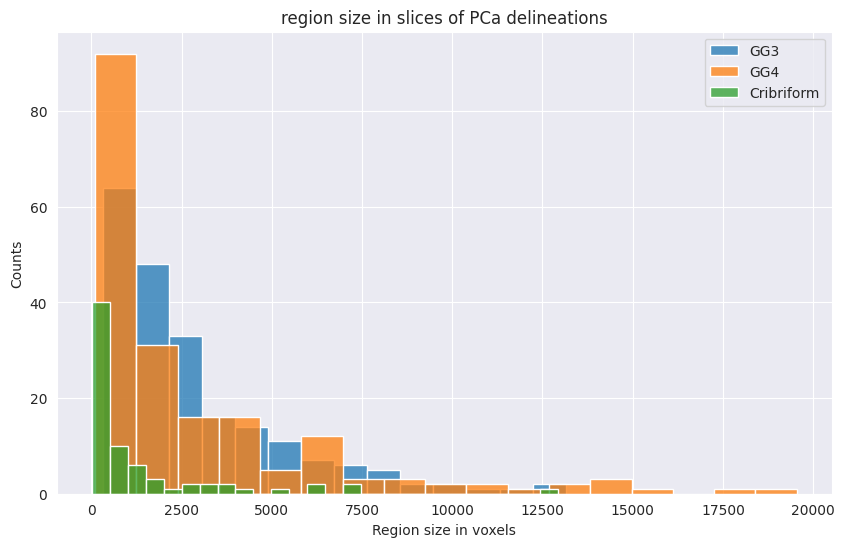

In [17]:
# Slices plot only
fig, axes = plt.subplots(figsize = (10, 6))
sns.histplot(data = gg3_sizes_fullimg, ax = axes)
sns.histplot(data = gg4_sizes_fullimg, ax = axes)
sns.histplot(data = lesion_sizes_fullimg["Cribriform"], ax = axes)
plt.legend(labels = lesion_sizes_slices.keys())

axes.set_title("region size in slices of PCa delineations")
plt.xlabel("Region size in voxels")
plt.ylabel("Counts")

In [18]:
mean_x = int(np.mean([x[0] for x in shapes]))
mean_y = int(np.mean([x[1] for x in shapes]))
mean_z = int(np.mean([x[2] for x in shapes]))

print(mean_x, mean_y, mean_z)

print("Average size of MRI's:", mean_x * mean_y * mean_z)
print("Average size of slice:", mean_x * mean_y)


589 589 28
Average size of MRI's: 9713788
Average size of slice: 346921


### For V(cc) converted region sizes of patients

Text(0, 0.5, 'Counts')

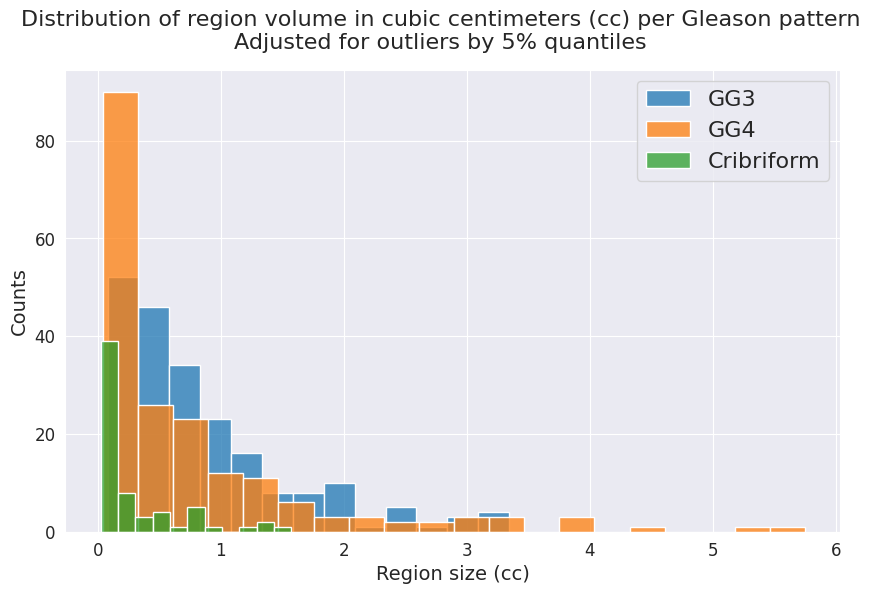

In [19]:
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=24)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=16)  # fontsize of the figure title

# Slices plot only
fig, axis = plt.subplots(figsize = (10, 6))

plt.suptitle("Distribution of region volume in cubic centimeters (cc) per Gleason pattern\n" +
             "Adjusted for outliers by 5% quantiles")

# Full image
gg3_sizes_vcc = remove_outliers(region_sizes_vcc["GG3"], alpha = 0.05)
gg4_sizes_vcc = remove_outliers(region_sizes_vcc["GG4"], alpha = 0.05)
cribriform_sizes_vcc = remove_outliers(region_sizes_vcc["Cribriform"], alpha = 0.05)


sns.histplot(data = gg3_sizes_vcc, ax = axis)
sns.histplot(data = gg4_sizes_vcc, ax = axis)
sns.histplot(data = cribriform_sizes_vcc, ax = axis)
plt.legend(labels = region_sizes_vcc.keys())
plt.xlabel("Region size (cc)")
plt.ylabel("Counts")

In [20]:
region_sizes_vcc

lesion_size_vcc_stats = pd.DataFrame({
    "Mean (cc)": [round(np.mean(region_sizes_vcc["GG3"]), 3), 
             round(np.mean(region_sizes_vcc["GG4"]), 3), 
             round(np.mean(region_sizes_vcc["Cribriform"]), 3)],
    "Median (cc)": [round(np.median(region_sizes_vcc["GG3"]), 3), 
               round(np.median(region_sizes_vcc["GG4"]), 3), 
               round(np.median(region_sizes_vcc["Cribriform"]), 3)]
}, index=["gg3",
          "gg4",
          "cribriform"
          ])

lesion_size_vcc_stats

,Mean (cc),Median (cc)
gg3,1.270,0.612
gg4,1.287,0.393
cribriform,0.435,0.125


### Background vs lesion delineation ratio

Here subimgs will be analyzed and compared to the slice variant. Using the full image data here would be unrepresentative of the actual methods used in training, since the background data would be bloated as most of the slices do not contain a delineation but also are not used because they do not contain a delineation.

In [25]:
ratios_percentages_subimg
ratios_percentages_slices[0:5]

[0.2758, 0.9656, 0.9979, 0.6976, 0.3583]

In [1]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))
plt.suptitle("Distribution of ratio of delineation voxels vs background voxels")

sns.histplot(ratios_percentages_subimg, ax = axes[0])
axes[0].axvline(np.mean(ratios_percentages_subimg), color = 'red', label = f"mean = {round(np.mean(ratios_percentages_subimg), 2)}%")
axes[0].set_title("Patients")
axes[0].set_xlabel("Percentage")
axes[0].legend()

sns.histplot(ratios_percentages_slices, ax = axes[1])
axes[1].axvline(np.mean(ratios_percentages_slices), color = 'red', label = f"mean = {round(np.mean(ratios_percentages_slices), 2)}%")
# axes[1].set_title("Slices")
axes[1].set_title("slices")
axes[1].set_xlabel("Percentage")
axes[1].legend()



NameError: name 'plt' is not defined

### Which slice numbers generally contain lesions?

In [27]:
slice_occupance_dist[:3]

[('MARPROC007',
  {'gg3': [11, 12, 13, 14, 15, 16, 17], 'gg4': [12, 13, 14], 'cribriform': []},
  30),
 ('MARPROC009',
  {'gg3': [14, 15, 16], 'gg4': [14], 'cribriform': [14, 15, 16]},
  40),
 ('MARPROC012', {'gg3': [13, 14, 15], 'gg4': [], 'cribriform': []}, 30)]

In [28]:
# Flatten to gain slice numbers that contain any lesion instead of per Gleason pattern
flattened_lesion_slices_distribution = [(set([slice_number for pattern_span in span_dict.items() for slice_number in pattern_span[1]]), slice_count) 
                                        for patient_id, span_dict, slice_count in slice_occupance_dist]
flattened_lesion_slices_distribution[:3]

[({11, 12, 13, 14, 15, 16, 17}, 30), ({14, 15, 16}, 40), ({13, 14, 15}, 30)]

In [29]:
# Divide each slice number by the total amount of slices of the image it originates from
# This gives the relative lesion occupied slices across images, regardless of differing slice numbers between images
ratio_lesion_slices_distribution = [[slice_number/slice_count for slice_number in pattern_span]
                                    for pattern_span, slice_count in flattened_lesion_slices_distribution]
ratio_lesion_slices_distribution[:3]

[[0.36666666666666664,
  0.4,
  0.43333333333333335,
  0.4666666666666667,
  0.5,
  0.5333333333333333,
  0.5666666666666667],
 [0.4, 0.35, 0.375],
 [0.43333333333333335, 0.4666666666666667, 0.5]]

In [30]:
# Condense list to single list of numbers for plotting
lesion_occupied_slices = [x for xs in ratio_lesion_slices_distribution for x in xs]
lesion_occupied_slices[:10]

[0.36666666666666664,
 0.4,
 0.43333333333333335,
 0.4666666666666667,
 0.5,
 0.5333333333333333,
 0.5666666666666667,
 0.4,
 0.35,
 0.375]

Text(0.5, 0, 'Amount of occurrences')

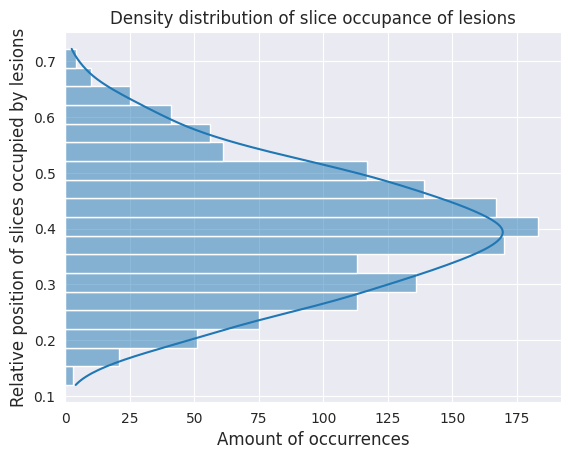

In [35]:
# fig, ax = plt.subplots(figsize=(10, 6))

g = sns.histplot(y = lesion_occupied_slices,
            kde=True,
            bins = 18)



plt.title("Density distribution of slice occupance of lesions")
plt.ylabel("Relative position of slices occupied by lesions", fontsize = 12)
plt.xlabel("Amount of occurrences", fontsize = 12)




In [33]:
occupance_counts = defaultdict(int)

largest_slice_number_with_delineation = 0
patients_to_check = []

flattened_lesion_slices_distribution
for ith_patient, image in enumerate(flattened_lesion_slices_distribution):
    should_check = False

    for slice in image[0]:
        occupance_counts[slice] += 1

        if slice < 5:
            should_check = True
        
    if should_check == True:
        patient_id = slice_occupance_dist[ith_patient][0]
        patients_to_check.append(patient_id)
        print(patient_id, " has a delineation in slices near the borders of data")
        print(slice_occupance_dist[ith_patient])
        print("---\n")


    slice_occupance_dist[ith_patient][0]


occupance_counts_df = pd.DataFrame(occupance_counts.values(), index=occupance_counts.keys()).sort_index()
display(occupance_counts_df)

MARPROC382  has a delineation in slices near the borders of data
('MARPROC382', {'gg3': [4, 5, 6, 7, 8, 9, 10, 11], 'gg4': [5, 6, 7], 'cribriform': []}, 25)
---

MARPROC384  has a delineation in slices near the borders of data
('MARPROC384', {'gg3': [4, 5, 6, 7, 8], 'gg4': [4, 5, 6, 7, 8], 'cribriform': []}, 30)
---

MARPROC438  has a delineation in slices near the borders of data
('MARPROC438', {'gg3': [4, 5, 6, 7, 8], 'gg4': [], 'cribriform': []}, 30)
---

MARPROC444  has a delineation in slices near the borders of data
('MARPROC444', {'gg3': [4, 5, 6], 'gg4': [], 'cribriform': []}, 25)
---

MARPROC481  has a delineation in slices near the borders of data
('MARPROC481', {'gg3': [3, 4, 5, 6, 7, 8, 9, 10, 11], 'gg4': [7, 9, 10, 11, 12], 'cribriform': []}, 25)
---

MARPROC482  has a delineation in slices near the borders of data
('MARPROC482', {'gg3': [4, 5], 'gg4': [], 'cribriform': []}, 25)
---

MARPROC560  has a delineation in slices near the borders of data
('MARPROC560', {'gg3': [4

,0
3,1
4,8
5,23
6,44
7,70
8,102
9,106
10,122
11,130
12,134


Checking the model data of patients that have delineations close to the borders of their delineation images

In [34]:
patients_to_check

['MARPROC382',
 'MARPROC384',
 'MARPROC438',
 'MARPROC444',
 'MARPROC481',
 'MARPROC482',
 'MARPROC560',
 'MARPROC570']

In [45]:
for patient_id in patients_to_check:
    print("Patient: ", patient_id)
    patient = Patient.load_patient_from_pkl(patient_id)
    patient_adc_modeldata = patient.model_data["adcmap"]
    patient_perfusion_modeldata = patient.model_data["perfusionmap"]

    print(patient.get_patient_delineation_slices())
    print("adc:")
    print("    ", ["X" if np.any(slice != 0) else "_" 
                for slice in np.rollaxis(patient.model_data["adcmap"].get_fdata(), axis = 2)
                ])
    print()
    print("perfusion:")
    print("    ", ["X" if np.any(slice != 0) else "_" 
                for slice in np.rollaxis(patient.model_data["perfusionmap"].get_fdata(), axis = 2)
                ])
    print("\n\n")

Patient:  MARPROC382
{'gg3': [4, 5, 6, 7, 8, 9, 10, 11], 'gg4': [5, 6, 7], 'cribriform': []}
adc:
     ['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']

perfusion:
     ['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']



Patient:  MARPROC384
{'gg3': [4, 5, 6, 7, 8], 'gg4': [4, 5, 6, 7, 8], 'cribriform': []}
adc:
     ['X', 'X', 'X', 'X', 'X']

perfusion:
     ['X', 'X', 'X', 'X', 'X']



Patient:  MARPROC438
{'gg3': [4, 5, 6, 7, 8], 'gg4': [], 'cribriform': []}
adc:
     ['X', 'X', 'X', 'X', 'X']

perfusion:
     ['X', 'X', 'X', 'X', 'X']



Patient:  MARPROC444
{'gg3': [4, 5, 6], 'gg4': [], 'cribriform': []}
adc:
     ['X', 'X', 'X']

perfusion:
     ['X', 'X', 'X']



Patient:  MARPROC481
{'gg3': [3, 4, 5, 6, 7, 8, 9, 10, 11], 'gg4': [7, 9, 10, 11, 12], 'cribriform': []}
adc:
     ['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']

perfusion:
     ['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']



Patient:  MARPROC482
{'gg3': [4, 5], 'gg4': [], 'cribriform': []}
adc:
     ['X', 'X']

perfusion:
 

In [50]:
import os
import SimpleITK as sitk

In [49]:
path_to_final_dataset = f"../data/nnUNet_raw/Dataset005_pca/"
path_to_train_images = f"{path_to_final_dataset}/imagesTr"
path_to_test_images = f"{path_to_final_dataset}/imagesTs"
path_to_set_delineations = f"{path_to_final_dataset}/labelsTr"

num_train_patients = int(len(os.listdir(path_to_train_images))/3)
num_test_patients = int(len(os.listdir(path_to_test_images))/3)

In [48]:
print(num_train_patients)
print(num_test_patients)
print(num_train_patients + num_test_patients)

213
53
266


In [70]:
total_amount_slices_train = 0
total_amount_slices_test = 0

for file in os.listdir(path_to_train_images)[::3]:
    delineation = sitk.ReadImage(f"{path_to_train_images}/{file}")
    delineation_array = sitk.GetArrayFromImage(delineation)
    total_amount_slices_train += delineation_array.shape[0]


for file in os.listdir(path_to_test_images)[::3]:
    delineation = sitk.ReadImage(f"{path_to_test_images}/{file}")
    delineation_array = sitk.GetArrayFromImage(delineation)
    total_amount_slices_test += delineation_array.shape[0]


1136


In [72]:
print(total_amount_slices_train)
print(total_amount_slices_test)
print(total_amount_slices_train + total_amount_slices_test)

1136
290
1426
